In [1]:
#----------------------------------------------------------------
#  Author:        TFT
#  Written:       05/02/2018
#  Last updated:  05/02/2018
#
#
#  TFT Machine Learning
#  Assignment  Week 3-1
#
#----------------------------------------------------------------

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import time

# download the dataset
# each image is 28 x 28 
mnist = input_data.read_data_sets('data/MNIST',one_hot=True)

Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data/MNIST/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


55000
5000
10000
(55000, 784)
(55000, 10)
(784,)
(10,)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
3


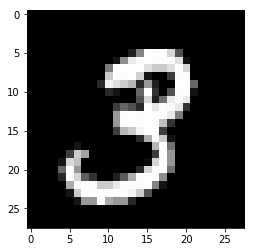

In [3]:
print(mnist.train.num_examples)
print(mnist.validation.num_examples)
print(mnist.test.num_examples)
print(mnist.train.images.shape)
print(mnist.train.labels.shape)
img = mnist.train.images[1]
label = mnist.train.labels[1]
print(img.shape)
print(label.shape)
print(label)
print(np.argmax(label))

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img.reshape([28,28]), cmap = "gray")
plt.show()

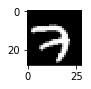

Ground Truth: 7


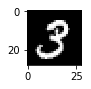

Ground Truth: 3


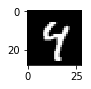

Ground Truth: 4


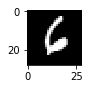

Ground Truth: 6


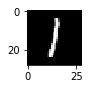

Ground Truth: 1


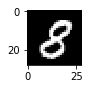

Ground Truth: 8


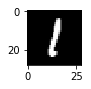

Ground Truth: 1


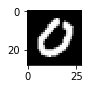

Ground Truth: 0


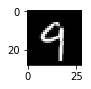

Ground Truth: 9


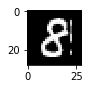

Ground Truth: 8


In [4]:
for i in range(10):
    img = mnist.train.images[i]
    label = mnist.train.labels[i]
    plt.figure(figsize=(1,1))
    plt.imshow(img.reshape([28, 28]), cmap = "gray")
    plt.show()
    cls = np.argmax(label)
    print("Ground Truth: %d" % cls)

In [5]:
# 1. Create the model (build the compuation graph)
## Hyperparameters
batch_size = 64
n_input = 784 # 784 = 28 x 28
n_hidden = 256
n_classes = 10
learning_rate = 0.01

## Model input
x = tf.placeholder(tf.float32, [None, n_input])

## Hidden layer
W1 = tf.Variable(tf.random_normal([n_input, n_hidden], stddev=0.1))
b1 = tf.Variable(tf.zeros([n_hidden]))
h1 = tf.matmul(x, W1) + b1
h1 = tf.nn.relu(h1)

## Hidden layer
#W2 = tf.Variable(tf.random_normal([n_hidden, n_hidden], stddev=0.1))
#b2 = tf.Variable(tf.zeros([n_hidden]))
#h2 = tf.matmul(h1, W2) + b2
#h2 = tf.nn.relu(h2)

## Output layer
W_out = tf.Variable(tf.random_normal([n_hidden, n_classes], stddev=0.1))
b_out = tf.Variable(tf.zeros([n_classes]))
y_pred = tf.matmul(h1, W_out) + b_out

#W1 = tf.Variable(tf.random_normal([n_input, n_classes], stddev=0.1))
#b1 = tf.Variable(tf.zeros([n_classes]))
#y_pred = tf.matmul(x, W1) + b1


## Define loss and optimizer
y_gt = tf.placeholder(tf.float32, [None, n_classes])
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_pred, labels=y_gt, name='loss'))

## Train (update model parameters)
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
#optimizer = tf.train.MomentumOptimizer(learning_rate, 0.9)
#optimizer = tf.train.AdamOptimizer()
train_step = optimizer.minimize(loss)

## Compute Accuracy
cls_pred = tf.argmax(y_pred, axis = 1)
cls_gt = tf.argmax(y_gt, axis = 1)
correct_prediction = tf.equal(cls_pred, cls_gt)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [6]:
# 2. Train
## Initialize
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
max_iter = 500
for iter in range(max_iter):
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    sess.run(train_step, feed_dict = {x: batch_x, y_gt: batch_y})
    if iter % 100 == 0:
        train_loss = sess.run(loss, feed_dict = {x: batch_x, y_gt: batch_y})
        train_accuracy = sess.run(accuracy, feed_dict = {x: batch_x, y_gt: batch_y})
        
        validation_x = mnist.validation.images
        validation_y = mnist.validation.labels
        validation_accuracy = sess.run(accuracy, {x: validation_x, y_gt: validation_y})
        
        print("iter step %d, loss %f, training accuracy %f, validation accuracy %f" %
              (iter, train_loss, train_accuracy, validation_accuracy))

iter step 0, loss 2.533527, training accuracy 0.046875, validation accuracy 0.095000
iter step 100, loss 1.348325, training accuracy 0.625000, validation accuracy 0.648000
iter step 200, loss 0.946921, training accuracy 0.750000, validation accuracy 0.765800
iter step 300, loss 0.881186, training accuracy 0.734375, validation accuracy 0.805400
iter step 400, loss 0.572827, training accuracy 0.875000, validation accuracy 0.836800


In [7]:
# 3. Test the trained model
train_x = mnist.train.images
train_y = mnist.train.labels
train_accuracy = sess.run(accuracy, {x: train_x, y_gt: train_y})

validation_x = mnist.validation.images
validation_y = mnist.validation.labels
validation_accuracy = sess.run(accuracy, {x: validation_x, y_gt: validation_y})

test_x = mnist.test.images
test_y = mnist.test.labels
test_accuracy = sess.run(accuracy, {x: test_x, y_gt: test_y})

print("train accuray: %f" % train_accuracy)
print("validation accuray: %f" % validation_accuracy)
print("test accuray: %f" % test_accuracy)

train accuray: 0.844782
validation accuray: 0.849800
test accuray: 0.854000


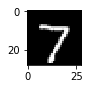

Ground Truth: 7
Model prediction: 7


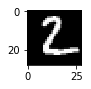

Ground Truth: 2
Model prediction: 6


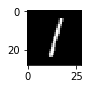

Ground Truth: 1
Model prediction: 1


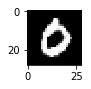

Ground Truth: 0
Model prediction: 0


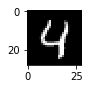

Ground Truth: 4
Model prediction: 4


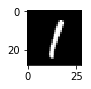

Ground Truth: 1
Model prediction: 1


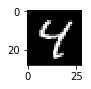

Ground Truth: 4
Model prediction: 4


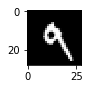

Ground Truth: 9
Model prediction: 9


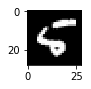

Ground Truth: 5
Model prediction: 2


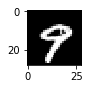

Ground Truth: 9
Model prediction: 7


In [8]:
for i in range(10):
    img = mnist.test.images[i]
    label = mnist.test.labels[i]
    plt.figure(figsize=(1,1))
    plt.imshow(img.reshape([28, 28]), cmap = "gray")
    plt.show()
    cls = np.argmax(label)
    print("Ground Truth: %d" % cls)
    
    pred_label = sess.run(y_pred, feed_dict = {x: img.reshape([1, -1])})
    pred_cls = np.argmax(pred_label)
    print("Model prediction: %s" % pred_cls)